In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# from pytrends.request import TrendReq

from pytrends.request import TrendReq
import time
import plotly.io as pio
pio.renderers.default = "browser"

time.sleep(10)




In [91]:
# pytrends = TrendReq(hl = 'en-US' , tz = 360)
# keyword = "cloud computing"
pytrends = TrendReq(hl='en-US', tz=330)

keyword = input('Enter your word')

# pytrends.build_payload([keyword], timeframe='today 12-m')

Data Request


In [93]:
# pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')
pytrends.build_payload(
    [keyword],
    timeframe='today 3-m', geo='',gprop=''   # NOT 12-m
)



In [95]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(10)

C:\Users\shrey\AppData\Local\Temp\ipykernel_26976\3192352213.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




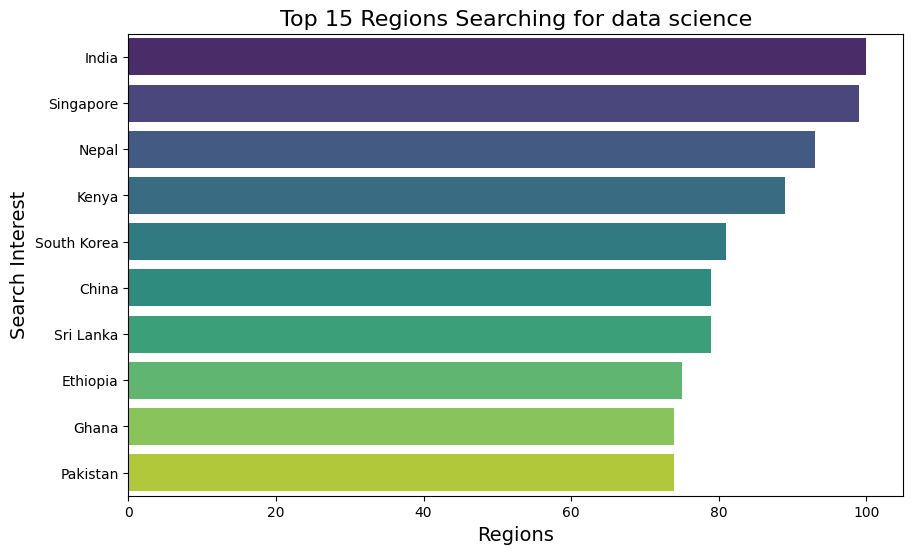

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(x = region_data[keyword], y= region_data.index, palette='viridis')

plt.title(f'Top 15 Regions Searching for {keyword}', fontsize=16)
plt.xlabel('Regions', fontsize=14)
plt.ylabel('Search Interest', fontsize=14)
plt.show()

World MAP

In [100]:

# Ensure region names are a column named 'geoName' for choropleth
region_data = region_data.reset_index()
# Rename the first column (index column) to 'geoName' if needed
first_col = region_data.columns[0]
if first_col != 'geoName':
    region_data = region_data.rename(columns={first_col: 'geoName'})

fig = px.choropleth(
    region_data,
    locations='geoName',
    locationmode='country names',
    color=keyword,
    title=f'Global Search Interest for {keyword}',
    color_continuous_scale='Blues'
)

fig.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_26976\506336962.py:8: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



DuplicateError: Expected unique column names, got:
- 'geoName' 4 times

Time Wise Interest

In [101]:
time_df = pytrends.interest_over_time()



c:\Users\shrey\SHLOK Python Code\.venv\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

